# SASAP Network Generation

In order to calculate distance in Alaska, we need to build a full network

## Generating the River Network

I'll need to go back and describe what I did to build the river network. That will be fun.

Input data:

* River network for US side came from [here](https://nationalmap.gov/small_scale/atlasftp.html?openChapters=chpwater#chpwater) in the "Hydrographic Geodatabase - Alaska, One Million-Scale" ([download link](https://prd-tnm.s3.amazonaws.com/StagedProducts/Small-scale/data/Hydrography/hydrakm010g.gdb_nt00894.tar.gz)). It's the layer called "`hydrakm010g Stream`".
* Canadian streams came from IJC? Links and documentation? Second order and up, I think?
* processing
* uh, other stuff

Second order and greater for display:

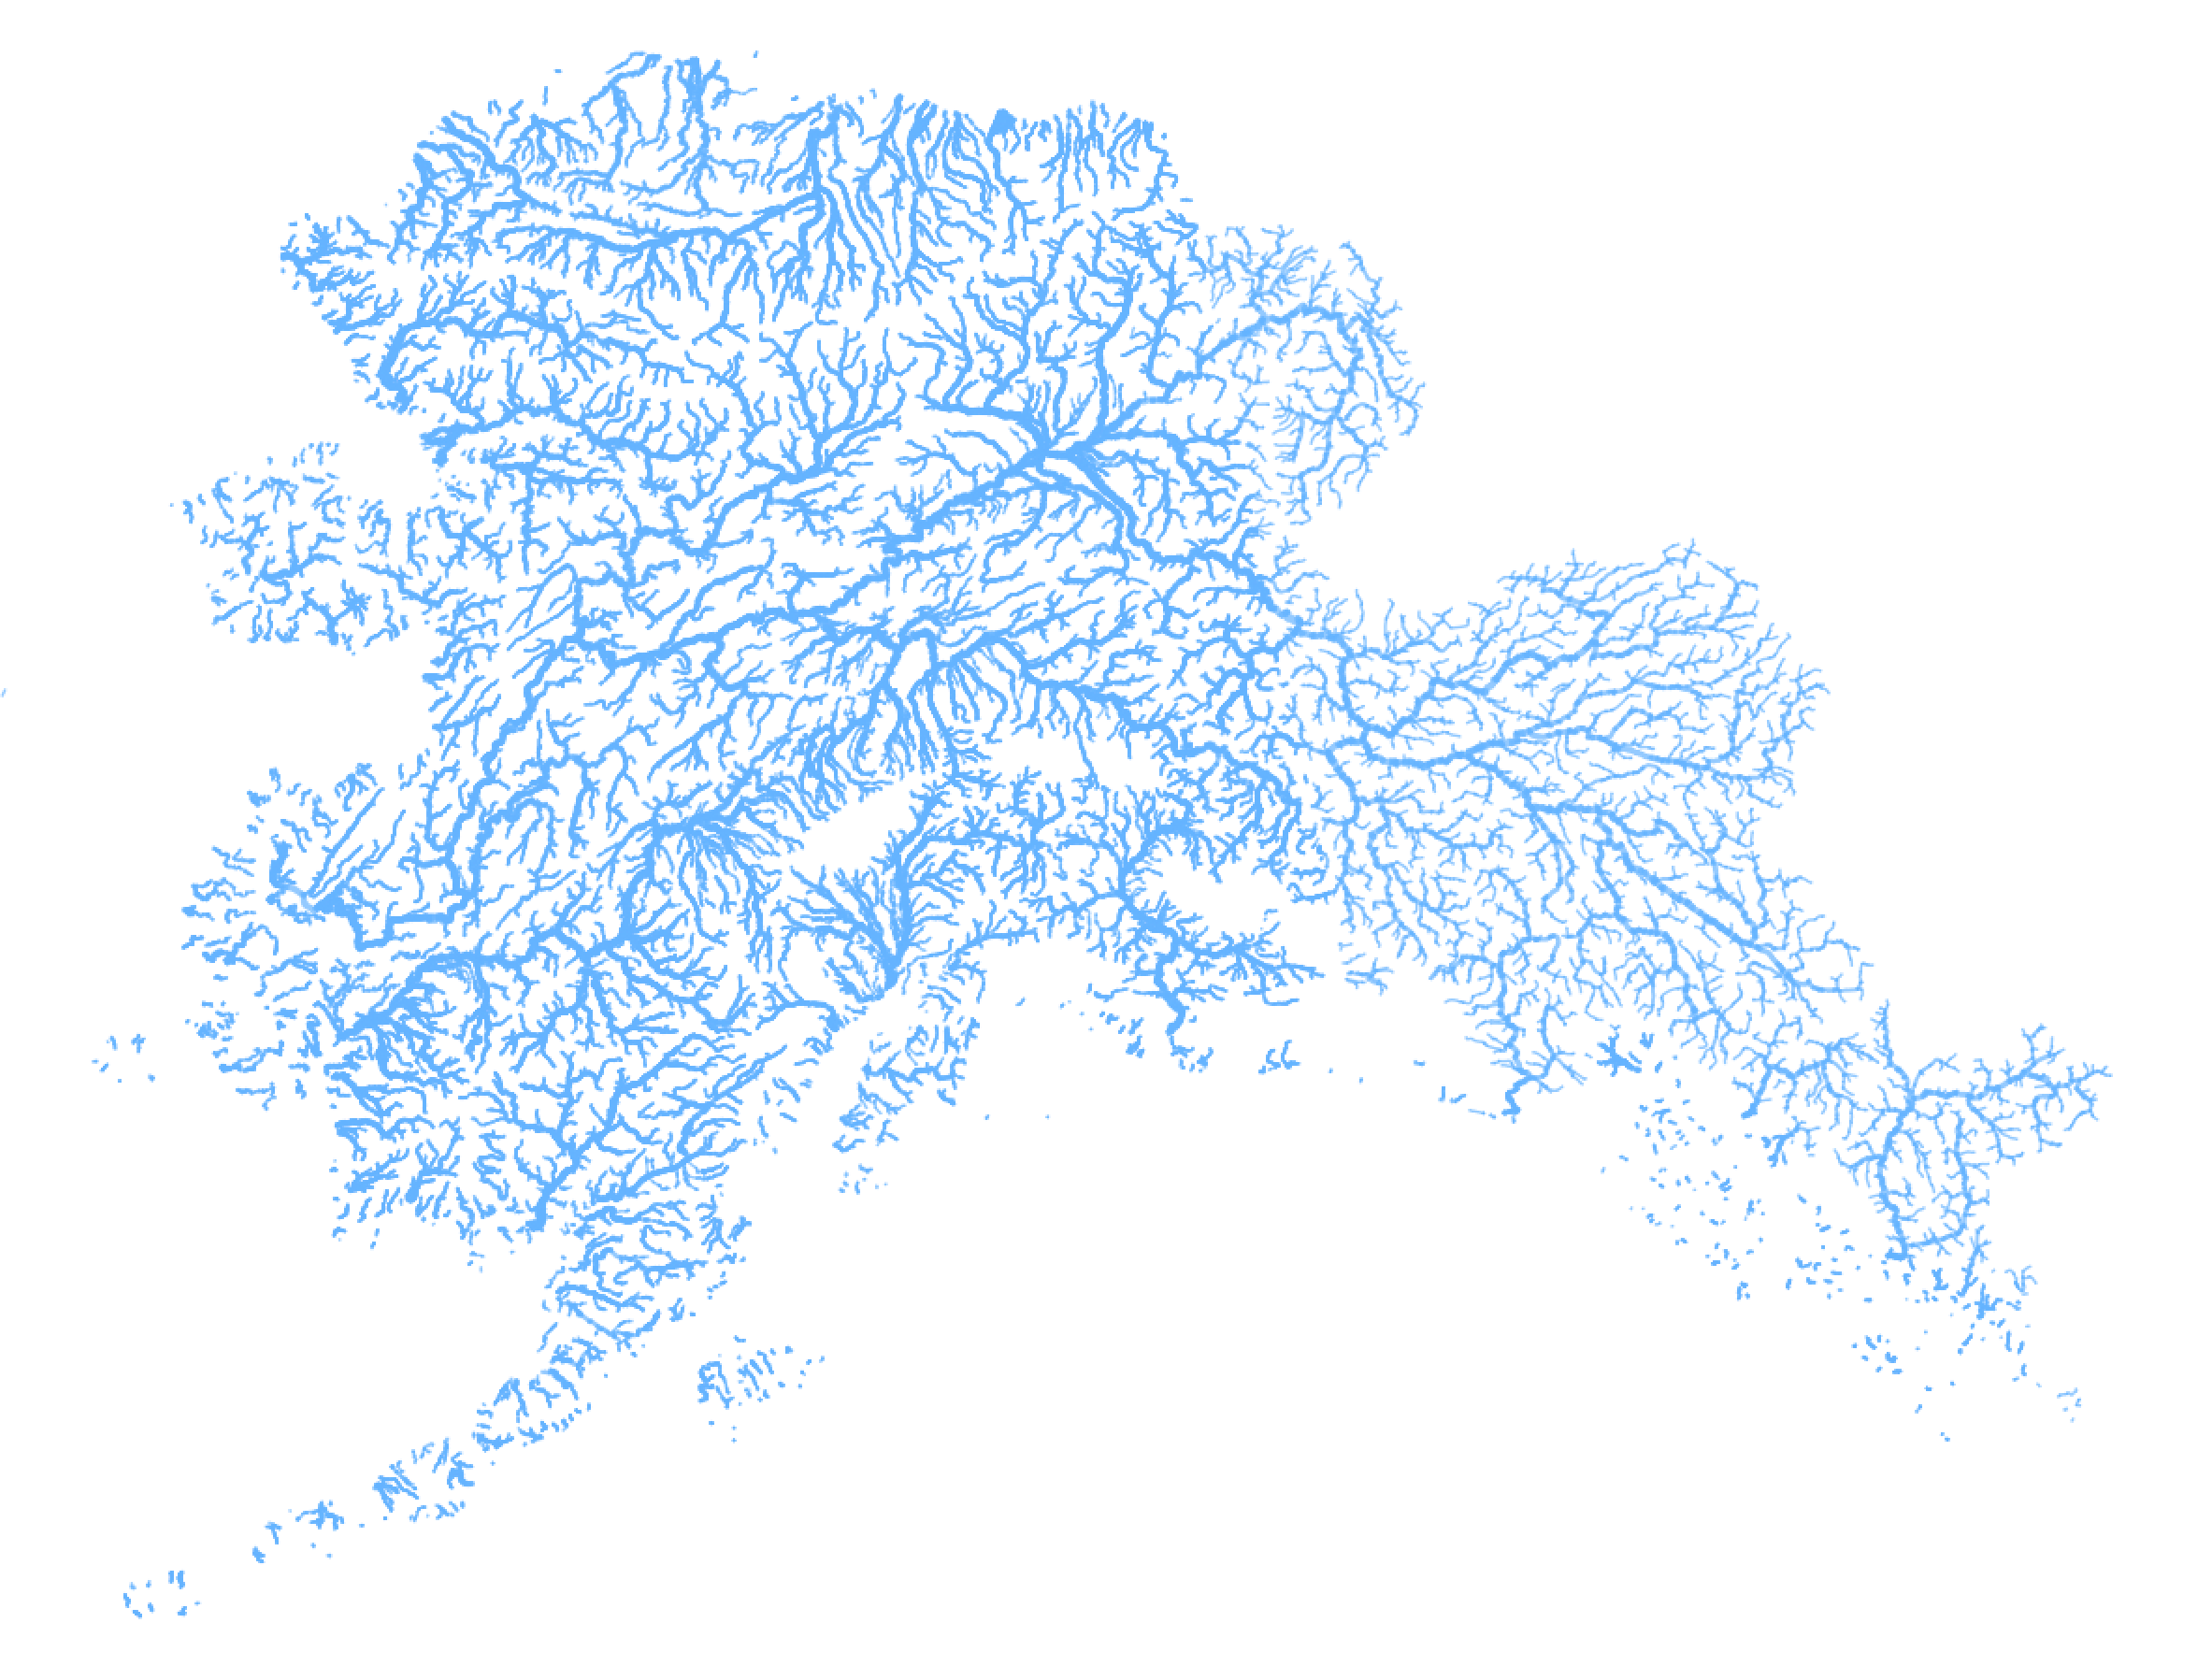

## Generating the Coastal Network

### Choosing a Coastline and Making a Polygon

I need to choose a coastline that gets the rivermouths as close to the coast as possible. Unfortunately, I can't find any polygons that really fit the bill, so I'll be using a line to generate a polygon. I considered the National Map Hydrography data (I think that's what it's called, the terminology is baffling) but it didn't treat the coastline exactly the same. The main problem is that the river mouths are located very far up the estuaries in my river data, so I need a coastline that goes all the way up there.

Long story short, I think we'll base the coast polygon off of the coastline feature ("`hydrakm010g Coastline`") found [here](https://nationalmap.gov/small_scale/atlasftp.html?openChapters=chpwater#chpwater) in the "Hydrographic Geodatabase - Alaska, One Million-Scale" [geodatabase](https://prd-tnm.s3.amazonaws.com/StagedProducts/Small-scale/data/Hydrography/hydrakm010g.gdb_nt00894.tar.gz). This coastline is from the same dataset as the US portion of the river network, so it should (in theory) line up well with the river mouths. That's the good news.

The bad news is two-fold:

1. It's a line feature
2. It's high resolution

So, we'll need to convert it to a polygon. That means we'll have to do a bunch of stuff "by hand" in QGIS. I'll try to take notes on that below. The high resolution part means that it will have heaps of verticies. The more vertices it has, the longer the network will take to build. ...and the longer it'll take to actually do the distance calculations. I'll try simplifying the coast a bit once I've got a polygon, but that's got it's own set of problems. Simplifying will probably end up moving the coastline just enough that the rivermouth verticies no longer connect directly to the coast.